<a target="_blank" href="https://colab.research.google.com/github/RanjeetKumbhar01/TE_IT_DSBDA_ASSIGNMENTS_SPPU/blob/main/Group_B/B_2/b_2_Heart.ipynb">
  <img align="left" alt="Goolge Colab"  src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# import pandas library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading csv file
df = pd.read_csv("Heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data Cleaning

In [3]:
df = df.drop_duplicates()

In [4]:
# Count ,min,max ,etc of each column
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Information about each column data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [6]:
#Finding null values in each column
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Integration

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.fbs.unique()

array([0, 1], dtype=int64)

In [10]:
subSet1 = df[['age','cp','chol','thal']]

In [11]:
subSet2 = df[['exang','slope','oldpeak']]

In [12]:
merged_df = subSet1.merge(right=subSet2,how='cross')
merged_df.head()

,age,cp,chol,thal,exang,slope,oldpeak
0,52,0,212,3,0,2,1.0
1,52,0,212,3,1,0,3.1
2,52,0,212,3,1,0,2.6
3,52,0,212,3,0,2,0.0
4,52,0,212,3,0,1,1.9


## Error Correcting

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]

In [22]:
# Remove outliers for each column using a loop
col_name = ['cp','thal','exang','oldpeak','slope','ca']
for col in col_name:
    df[col] = remove_outliers(df[col])

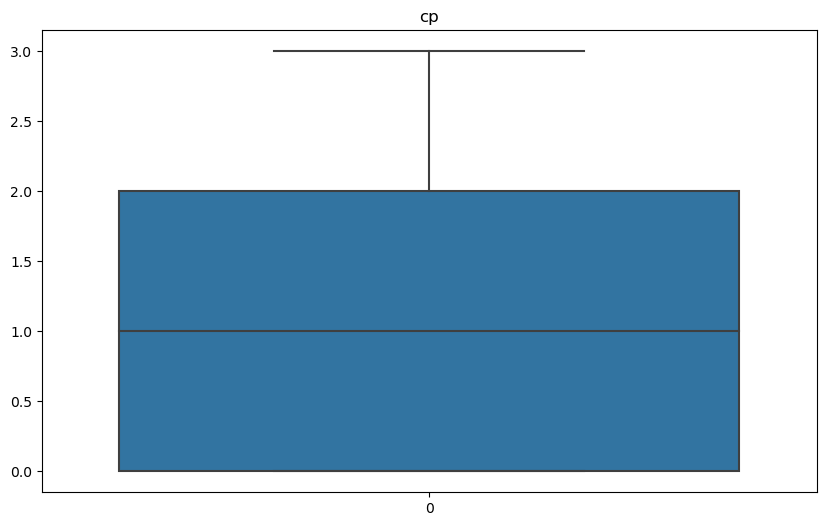

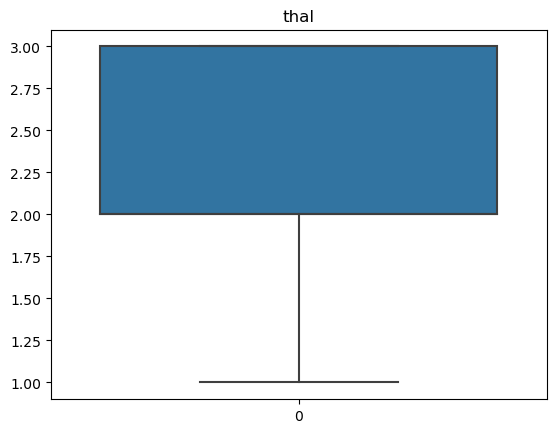

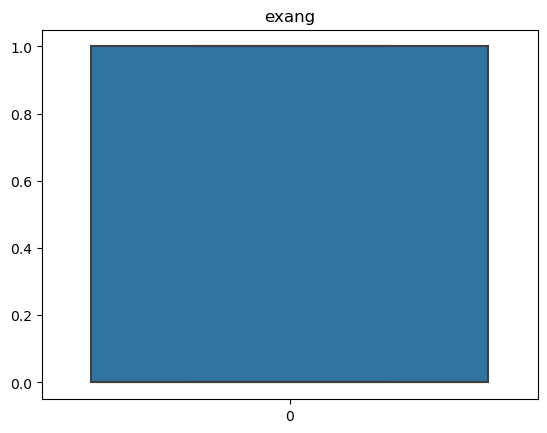

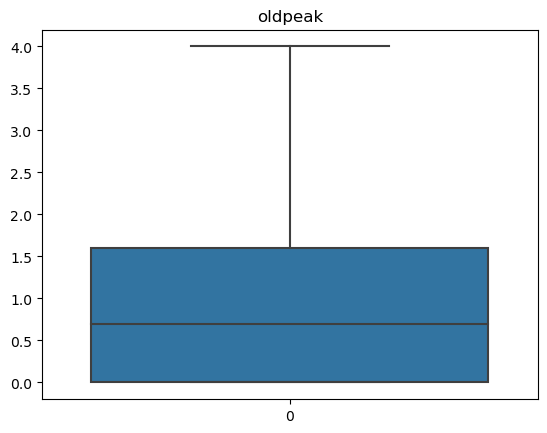

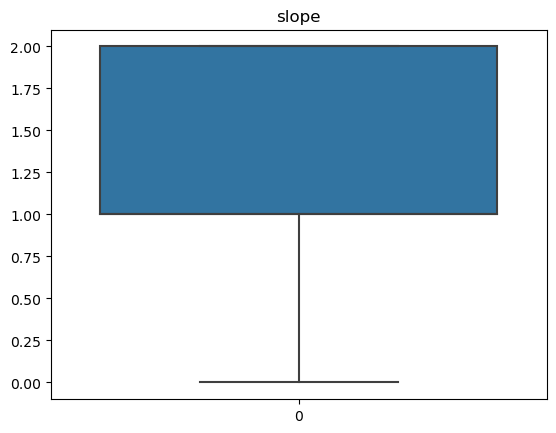

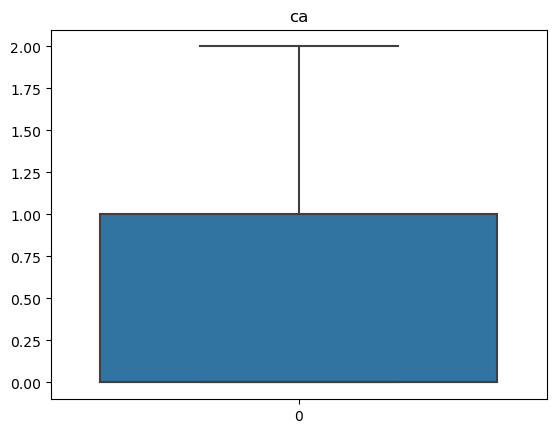

In [23]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for col in col_name:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

In [24]:
df = df.dropna()

In [25]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

df = df.drop('fbs',axis=1)

Correlation with the Target:
age        -0.199970
sex        -0.300311
cp          0.408985
trestbps   -0.132882
chol       -0.053834
restecg     0.125710
thalach     0.398870
exang      -0.435511
oldpeak    -0.436247
slope       0.327420
ca         -0.459629
thal       -0.389514
Name: target, dtype: float64



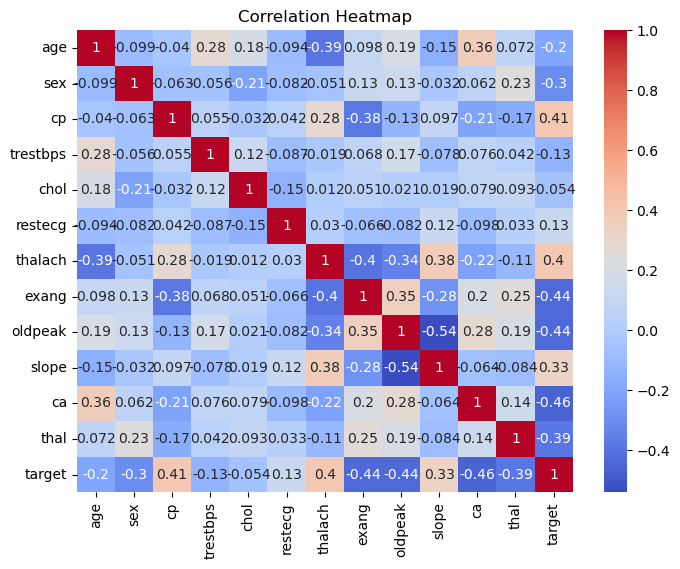

In [28]:
# Compute correlations between features and target
correlations = df.corr()['target'].drop('target')

# Print correlations
print("Correlation with the Target:")
print(correlations)
print()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# df.isna().sum()

## Data Split

In [30]:
# splitting data using train test split
x = df[['cp','thal','exang','oldpeak','slope','ca']]
y = df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((219, 6), (55, 6), (219,), (55,))

## Data transformation

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Data model building

In [34]:
y_train= np.array(y_train).reshape(-1, 1)
y_test= np.array(y_test).reshape(-1, 1)

In [35]:
y_train.shape

(219, 1)

In [36]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8181818181818182


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
#Classification model using Decision Tree
from sklearn.tree import DecisionTreeClassifier
tc=DecisionTreeClassifier(criterion='entropy')
tc.fit(x_train_scaled,y_train)
y_pred=tc.predict(x_test_scaled)

print("Training Accuracy Score :",accuracy_score(y_pred,y_test))
print("Training Confusion Matrix  :",confusion_matrix(y_pred,y_test))

Training Accuracy Score : 0.7272727272727273
Training Confusion Matrix  : [[21  6]
 [ 9 19]]


In [38]:
confusion_matrix(y_test,y_pred)

array([[21,  9],
       [ 6, 19]], dtype=int64)